<a href="https://colab.research.google.com/github/Polyanat59/AluraStore/blob/main/AluraStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [12]:
lojas_dfs = {'Loja 1': loja,'Loja 2': loja2,'Loja 3': loja3}

for nome_da_loja, df_da_loja in lojas_dfs.items():
  faturamento = df_da_loja['Preço'].sum()
  print(f'Faturamento {nome_da_loja}: R$ {faturamento:.2f}')

Faturamento Loja 1: R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03


# 2. Vendas por Categoria


In [14]:
lojas_dfs = {'Loja 1': loja,'Loja 2': loja2,'Loja 3': loja3}

for nome_da_loja, df_da_loja in lojas_dfs.items():
  print('--=--' *20)
  print(f'{nome_da_loja} ')
  vendas_por_categoria = df_da_loja.groupby('Categoria do Produto')['Preço'].sum()
  print(vendas_por_categoria)


--=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=--
Loja 1 
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64
--=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=--
Loja 2 
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64
--=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=--
Loja 3 
Categoria do Pr

# 3. Média de Avaliação das Lojas

In [15]:
print("--- Média de Avaliação por Loja ---")

for nome_da_loja, df_da_loja in lojas_dfs.items():
    media_avaliacoes = df_da_loja['Avaliação da compra'].mean()
    print(f"Média de avaliação da {nome_da_loja}: {media_avaliacoes:.1f} estrelas")

--- Média de Avaliação por Loja ---
Média de avaliação da Loja 1: 4.0 estrelas
Média de avaliação da Loja 2: 4.0 estrelas
Média de avaliação da Loja 3: 4.0 estrelas


# 4. Produtos Mais e Menos Vendidos

In [18]:
print("--- Análise de Produtos Mais e Menos Vendidos ---")

for nome_da_loja, df_da_loja in lojas_dfs.items():
    print('--=--'*20)
    print(f"ANÁLISE DA LOJA: {nome_da_loja}")

    vendas_por_produto = df_da_loja['Produto'].value_counts()
    produto_mais_vendido = vendas_por_produto.idxmax()
    produto_menos_vendido = vendas_por_produto.idxmin()

    qtd_mais_vendido = vendas_por_produto.max()
    qtd_menos_vendido = vendas_por_produto.min()

    print(f"Produto MAIS vendido: '{produto_mais_vendido}' (vendido {qtd_mais_vendido} vezes).")
    print(f"Produto MENOS vendido: '{produto_menos_vendido}' (vendido {qtd_menos_vendido} vezes).")



--- Análise de Produtos Mais e Menos Vendidos ---
--=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=--
ANÁLISE DA LOJA: Loja 1
Produto MAIS vendido: 'Micro-ondas' (vendido 60 vezes).
Produto MENOS vendido: 'Headset' (vendido 33 vez(es)).
--=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=--
ANÁLISE DA LOJA: Loja 2
Produto MAIS vendido: 'Iniciando em programação' (vendido 65 vezes).
Produto MENOS vendido: 'Jogo de tabuleiro' (vendido 32 vez(es)).
--=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=----=--
ANÁLISE DA LOJA: Loja 3
Produto MAIS vendido: 'Kit banquetas' (vendido 57 vezes).
Produto MENOS vendido: 'Blocos de montar' (vendido 35 vez(es)).


# 5. Frete Médio por Loja


In [19]:
for nome_da_loja, df_da_loja in lojas_dfs.items():
    media_frete = df_da_loja['Frete'].mean()
    print(f"Custo médio de frete da {nome_da_loja}: R$ {media_frete:.2f}")


Custo médio de frete da Loja 1: R$ 34.69
Custo médio de frete da Loja 2: R$ 33.62
Custo médio de frete da Loja 3: R$ 33.07


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
lojas_dfs = {
    'Loja 1': loja,
    'Loja 2': loja2,
    'Loja 3': loja3}
lista_de_dfs = [loja, loja2, loja3]
dataframe_unificado = pd.concat(lista_de_dfs)

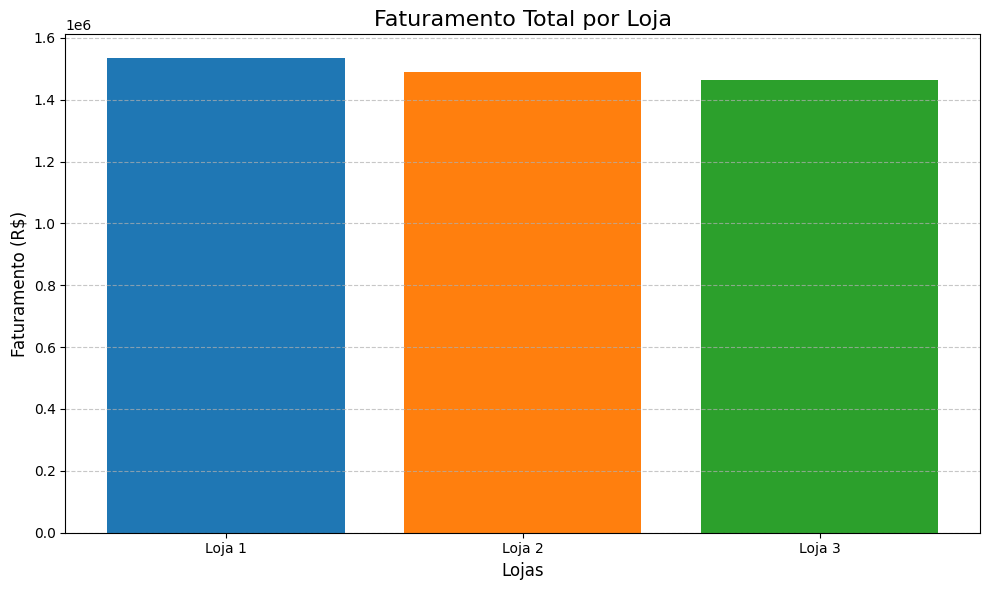

In [23]:
nomes_lojas = []
faturamentos_totais = []

for nome, df in lojas_dfs.items():
    nomes_lojas.append(nome)
    faturamentos_totais.append(df['Preço'].sum())

plt.figure(figsize=(10, 6))
plt.bar(nomes_lojas, faturamentos_totais, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Faturamento Total por Loja', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

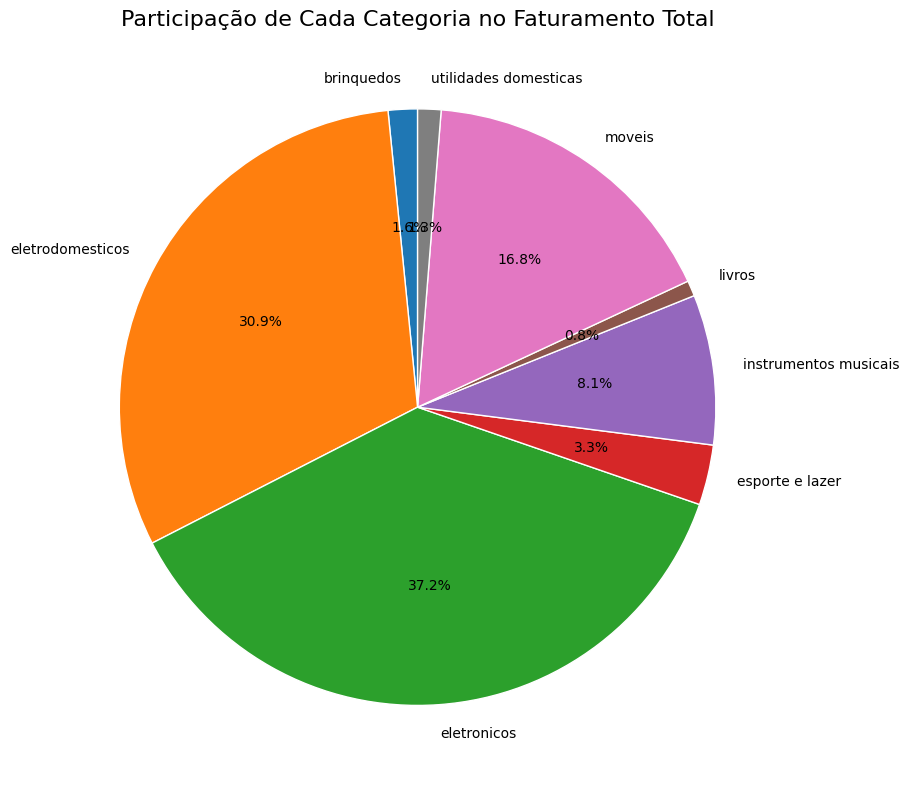

In [27]:
faturamento_por_categoria = dataframe_unificado.groupby('Categoria do Produto')['Preço'].sum()

plt.figure(figsize=(12, 8))
faturamento_por_categoria.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'})

plt.title('Participação de Cada Categoria no Faturamento Total', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

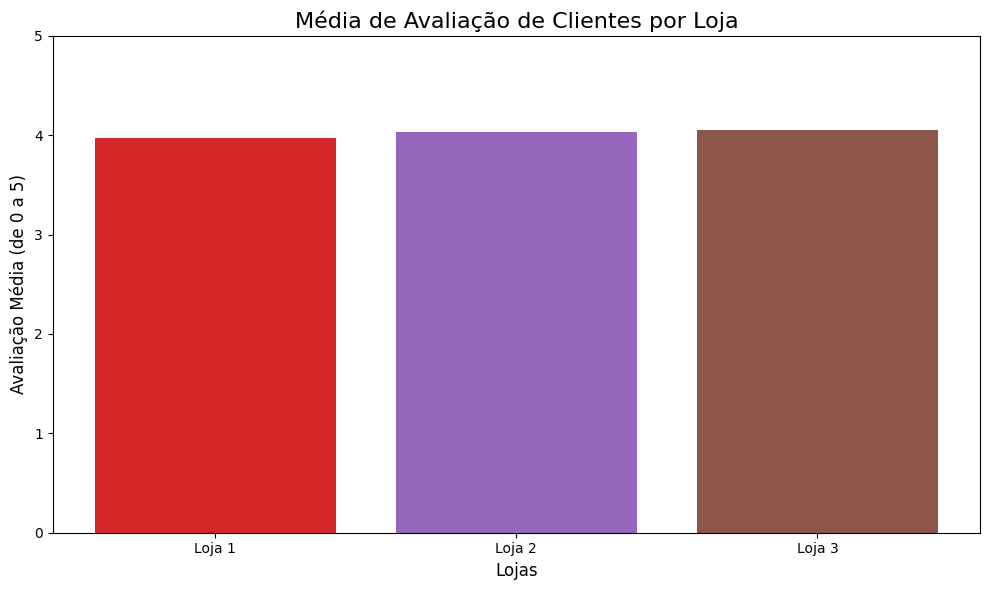

In [29]:
nomes_lojas_aval = []
avaliacoes_medias = []

for nome, df in lojas_dfs.items():
    nomes_lojas_aval.append(nome)
    avaliacoes_medias.append(df['Avaliação da compra'].mean())

plt.figure(figsize=(10, 6))
bars = plt.bar(nomes_lojas_aval, avaliacoes_medias, color=['#d62728', '#9467bd', '#8c564b'])

plt.ylim(0, 5)

plt.title('Média de Avaliação de Clientes por Loja', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Avaliação Média (de 0 a 5)', fontsize=12)
plt.tight_layout()
plt.show()